In [1]:
from paraview.simple import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [2]:
# Case files
# angles = ['05', '10', '15', '20', '25', '30']
angles = ['0.091', '0.182', '0.273', '0.364', '0.455', '0.546']
folder = [f'angle_value_{angle}/case.foam' for angle in angles]

# Properties of interest with geometry storage
properties = ['Ma', 'T', 'p', 'U']
store_files = ['Ma.png', 'T.png', 'p.png', 'U.png']

# Lineplot points
csv_files = [f'Figures/angle_value_{angle}/lineplot.csv' for angle in angles]
Point1 = [0.5, 0.0, 1.0]
EPS = 1e-3
Point2_y = [0.091, 0.182, 0.273, 0.364, 0.455, 0.546]
Point2_vec = [[1.5, point2+EPS, 1.0] for point2 in Point2_y]

# Plotting settings
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

In [3]:
# Load your case.foam file
foamCase = [OpenFOAMReader(FileName=folder_) for folder_ in folder]

# Update pipeline to read the time steps, etc.
[foamCase_.UpdatePipeline() for foamCase_ in foamCase]

[None, None, None, None, None, None]

In [4]:
foamCase_ = foamCase[0]
# renderView = GetActiveViewOrCreate('RenderView')
# SetActiveSource(foamCase_)
# display = Show(foamCase_, renderView)

hasattr(foamCase_, "TimestepValues")
final_time = foamCase_.TimestepValues[-1]
final_time, foamCase_.TimestepValues, foamCase_.GetDataInformation().GetNumberOfCells(), foamCase_.GetDataInformation().GetNumberOfPoints()

(0.1,
 [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.0101, 0.0102, 0.0103, 0.0104, 0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011, 0.0111, 0.0112, 0.0113, 0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012, 0.0121, 0.0122, 0.0123, 0.0124, 0.0125, 0.012

In [5]:
# UpdatePipeline(time=0.0999, proxy=foamCase_)
GetAnimationScene().AnimationTime = final_time
renderView = GetActiveViewOrCreate('RenderView')
SetActiveSource(foamCase_)
display = Show(foamCase_, renderView)

# Set properties to color by the specified property
ColorBy(display, ('POINTS', 'Ma'))
display.RescaleTransferFunctionToDataRange(True)
display.SetScalarBarVisibility(renderView, True)

# Set the color map for the specific property
lut = GetColorTransferFunction('Ma')
lut.ApplyPreset('Cool to Warm', True)
display.SetRepresentationType('Surface')
display.SetScalarBarVisibility(renderView, True)

# Set the camera
# Reset the camera to what would be the default in ParaView
ResetCamera()
# Apply camera parallel projection (orthographic view)
renderView.CameraParallelProjection = 1
# Show the orientation axes for better spatial reference
renderView.OrientationAxesVisibility = 1
# Set the background color to white
renderView.Background = [1.0, 1.0, 1.0]
# Set the view size
LoadPalette('WhiteBackground')
renderView.ViewSize = [600, 600]

# Store a figure
SaveScreenshot('test.png', renderView, magnification=2, quality=100)

True

In [6]:
def store_geometry(foamCase, property, store_file):
    # Create a geometry view and show the data
    renderView = GetActiveViewOrCreate('RenderView')
    SetActiveSource(foamCase)
    display = Show(foamCase, renderView)
    
    # If foamCase has multiple time steps, update to the final time step.
    if hasattr(foamCase, "TimestepValues"):# and foamCase.TimestepValues:
        # final_time = foamCase.TimestepValues[-1]
        # UpdatePipeline(time=final_time)
        final_time = foamCase_.TimestepValues[-1]
        GetAnimationScene().AnimationTime = final_time
        renderView.Update()

    # Set properties to color by the specified property
    ColorBy(display, ('POINTS', property))
    display.RescaleTransferFunctionToDataRange(True)
    display.SetScalarBarVisibility(renderView, True)

    # Set the color map for the specific property
    lut = GetColorTransferFunction(property)
    lut.ApplyPreset('Cool to Warm', True)
    display.SetRepresentationType('Surface')
    display.SetScalarBarVisibility(renderView, True)

    # Set the camera
    # Reset the camera to what would be the default in ParaView
    ResetCamera()
    # Apply camera parallel projection (orthographic view)
    renderView.CameraParallelProjection = 1
    # Show the orientation axes for better spatial reference
    renderView.OrientationAxesVisibility = 1
    # Set the background color to white
    renderView.Background = [1.0, 1.0, 1.0]
    # Set the view size
    LoadPalette('WhiteBackground')
    renderView.ViewSize = [600, 600]

    # Store a figure
    if store_file is not None:
        # Make sure directory exists before saving
        store_dir = os.path.dirname(store_file)
        if store_dir and not os.path.exists(store_dir):
            os.makedirs(store_dir, exist_ok=True)
        SaveScreenshot(store_file, renderView, magnification=2, quality=100)

    # Clean up
    Delete(display)
    Delete(renderView)

In [7]:
# # Loop over different geometries
# for i, foamCase_ in tqdm(enumerate(foamCase)):
#     # Set the active source to the current foamCase
#     # Loop through each property and store the geometry
#     store_file = f'Figures/angle_value_{angles[i]}'
#     if not os.path.exists(store_file):
#         os.mkdir(store_file)
#     # print(f'store_file: {store_file}')
#     for property, store_file_ in zip(properties, store_files):
#             store_file_ = f'{store_file}/{store_file_}'
#             # print(f'store_file_: {store_file_}')
#             store_geometry(foamCase_, property, store_file_)

In [8]:
def store_lineplot(foamCase, Point1, Point2, store_file, convergence=False):
    """
    Extract data along a line between Point1 and Point2, and save it to a CSV file.
    
    Parameters:
    -----------
    foamCase: paraview.servermanager.OpenFOAMReader
        The OpenFOAM reader object to extract data from
    Point1: list
        The starting point coordinates [x, y, z]
    Point2: list
        The ending point coordinates [x, y, z]
    store_file: str
        Path to save the CSV file
    """
    # Retrieve data information
    dataInfo = foamCase.GetDataInformation()

    # Get the total number of points (nodes) and cells
    total_points = dataInfo.GetNumberOfPoints()
    total_cells = dataInfo.GetNumberOfCells()

    print("Total number of points:", total_points)
    print("Total number of cells:", total_cells)
    # Create a render view for the pipeline
    renderView = GetActiveViewOrCreate('RenderView')

    # If foamCase has multiple time steps, update to the final time step.
    if hasattr(foamCase, "TimestepValues"):# and foamCase.TimestepValues:
        # final_time = foamCase.TimestepValues[-1]
        # UpdatePipeline(time=final_time)
        final_time = foamCase_.TimestepValues[-1]
        GetAnimationScene().AnimationTime = final_time
        renderView.Update()
    
    # Extract properties along a line
    lineSource = PlotOverLine(Input=foamCase)
    lineSource.Point1 = Point1
    lineSource.Point2 = Point2
    lineDisplay = Show(lineSource, renderView)
    lineDisplay.UpdatePipeline()

    # Render the view
    Render()

    # Make sure directory exists before saving
    store_dir = os.path.dirname(store_file)
    if store_dir and not os.path.exists(store_dir):
        os.makedirs(store_dir, exist_ok=True)
    
    # Add file extension if not present
    if not store_file.endswith('.csv'):
        store_file = store_file + '/lineplot.csv'
    
    # Save the line plot
    SaveData(store_file, proxy=lineSource)

    # Clean up
    Delete(lineSource)
    Delete(lineDisplay)
    Delete(renderView)

    if convergence:
        return total_points, total_cells

In [9]:

# # Example: Extract properties along a line
# lineSource = PlotOverLine(Input=foamCase)
# lineSource.Point1 = [0.5, 0.0, 1.0]
# lineSource.Point2 = [1.5, 0.091, 1.0]
# lineDisplay = Show(lineSource, renderView)
# lineDisplay.UpdatePipeline()

# # Render the view
# Render()

# # Save the line plot
# SaveData('line_plot.csv', proxy=lineSource)


In [10]:
# Loop over different geometries
for i, foamCase_ in tqdm(enumerate(foamCase)):
    store_lineplot(foamCase_, Point1, Point2_vec[i], csv_files[i])

2it [00:00,  9.87it/s]

Total number of points: 10302
Total number of cells: 5000
Total number of points: 10302
Total number of cells: 5000
Total number of points: 10302
Total number of cells: 5000


5it [00:00,  9.56it/s]

Total number of points: 10302
Total number of cells: 5000
Total number of points: 10302
Total number of cells: 5000
Total number of points: 10302
Total number of cells: 5000


6it [00:00,  9.61it/s]


In [11]:
# Load the line plot data
df = [pd.read_csv(csv_file) for csv_file in csv_files]

In [12]:
df[0].head()

,Ma,T,U:0,U:1,U:2,p,vtkValidPointMask,arc_length,Points:0,Points:1,Points:2
0,1.8910,314.60,675.70,5.2070,5.424200e-18,114200.0,1,0.000000,0.500,0.000000,1
1,1.8901,314.73,675.49,5.3258,5.237100e-18,114390.0,1,0.001004,0.501,0.000092,1
2,1.8891,314.86,675.29,5.4447,5.049900e-18,114580.0,1,0.002008,0.502,0.000184,1
3,1.8882,314.99,675.08,5.5635,4.862800e-18,114770.0,1,0.003013,0.503,0.000276,1
4,1.8873,315.12,674.87,5.6824,4.675700e-18,114960.0,1,0.004017,0.504,0.000368,1


In [13]:
M1 = 2.
T1 = 300.
p1 = 101325.

M2 = np.array([df_['Ma'].values[-1] for df_ in df])
T2 = np.array([df_['T'].values[-1] for df_ in df])
p2 = np.array([df_['p'].values[-1] for df_ in df])
# U2 = [df_['U'].values[-1] for df_ in df]

print(M2)
print(p2 / p1)
print(T2 / T1)

[1.8081  1.6138  1.4028  1.1455  0.75458 0.74662]
[1.33037256 1.73668887 2.22975574 2.85122132 3.70106094 3.81238589]
[1.08773333 1.18246667 1.2908     1.42743333 1.62053333 1.62803333]


In [14]:
def plot_all_geometries(df, entry, angles, xlabel, ylabel, title, savefig=None, colors=colors):
    fig, axs = plt.subplots()
    for i, df_ in enumerate(df):
        xaxis = df_['Points:0'].values
        axs.plot(
            xaxis, df_['Ma'], 
            label=f'$\Theta$ = {angles[i]}', 
            color=colors[i]
        )
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    fig.suptitle(title)
    axs.legend()
    axs.grid()
    fig.tight_layout()
    if savefig is not None:
        fig.savefig(savefig, dpi=300)
    fig.show()

<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_408/653807918.py:7: SyntaxWarning: invalid escape sequence '\T'
  label=f'$\Theta$ = {angles[i]}',


/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_408/653807918.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_408/653807918.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_408/653807918.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


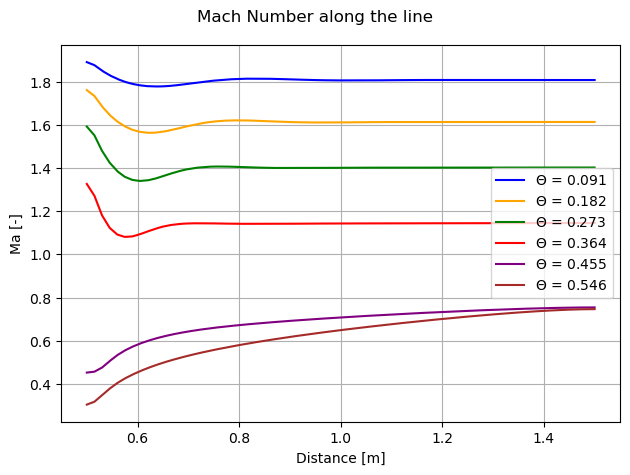

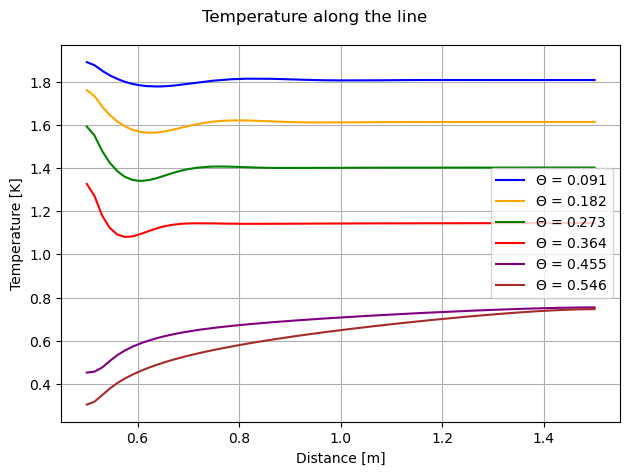

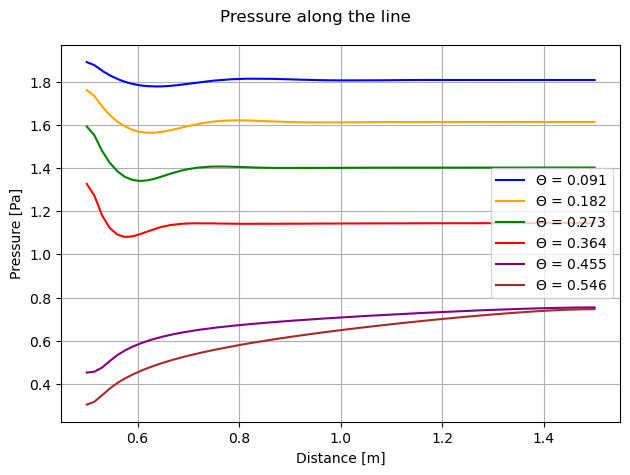

In [15]:
ylabels = [
    'Ma [-]', 
    'Temperature [K]', 
    'Pressure [Pa]', 
    # 'Velocity'
]
Title = [
    'Mach Number along the line', 
    'Temperature along the line', 
    'Pressure along the line', 
    # 'Velocity along the line'
]
# if not in os.path.exists('Figures/LinePlots'):
os.makedirs('Figures/LinePlots', exist_ok=True)
for prop, ylab, titl in zip(properties, ylabels, Title):
    savefig = f'Figures/LinePlots/{prop}.pdf'
    plot_all_geometries(
        df=df, 
        entry=prop, 
        angles=angles, 
        xlabel='Distance [m]',
        ylabel=ylab, 
        title=titl, 
        savefig=savefig
    )

# Convergence Analysis

## Grid

In [21]:
# Case files
nx = [10, 50, 100, 200]#!, 400]
folder_convergence = [f'convergence_{nx_}/case.foam' for nx_ in nx]

# Properties of interest with geometry storage
properties = ['Ma', 'T', 'p', 'U']

# Lineplot points
csv_files_convergence = [f'Figures/convergence/lineplot_{nx_}.csv' for nx_ in nx]
Point1_convergence = [0.5, 0.0, 1.0]
Point2_convergence = [1.5, 0.364 + EPS, 1.0]

# Plotting settings
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

In [22]:
# Load your case.foam file
foamCase_convergence = [OpenFOAMReader(FileName=folder_) for folder_ in folder_convergence]

# Update pipeline to read the time steps, etc.
[foamCase_.UpdatePipeline() for foamCase_ in foamCase_convergence]

[None, None, None, None]

In [23]:
os.makedirs('Figures/convergence', exist_ok=True)
# Loop over different geometries
total_points, total_cells = [], []
for i, foamCase_ in tqdm(enumerate(foamCase_convergence)):
    total_points_, total_cells_ = store_lineplot(foamCase_, Point1_convergence, Point2_convergence, csv_files_convergence[i], convergence=True)
    total_points.append(total_points_)
    total_cells.append(total_cells_)

1it [00:00,  8.25it/s]

Total number of points: 132
Total number of cells: 50
Total number of points: 2652
Total number of cells: 1250
Total number of points: 10302
Total number of cells: 5000


4it [00:00,  9.15it/s]

Total number of points: 40602
Total number of cells: 20000


In [24]:
df_convergence = [pd.read_csv(csv_file) for csv_file in csv_files_convergence]

In [36]:
p1

101325.0

In [33]:
p2p1

array([2.87964471, 2.86000493, 2.85122132, 2.84776709])

In [35]:
np.array(np.abs(p2p1 - 2.88)) / 2.88

array([0.00012337, 0.00694273, 0.0099926 , 0.01119198])

/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_408/3555560755.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


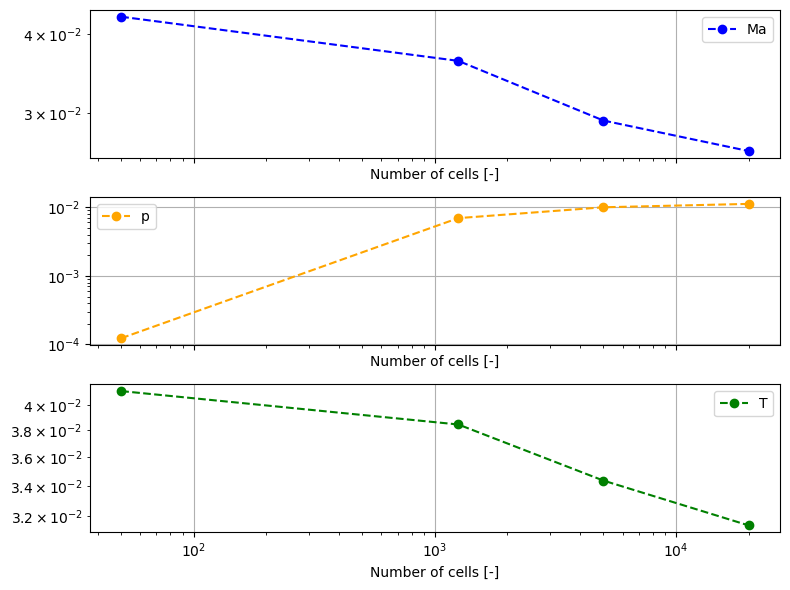

In [37]:
Ma2, T2, T2T1, p2, p2p1 = [], [], [], [], []
for i, df_ in enumerate(df_convergence):
    Ma2.append(df_['Ma'].values[-1])
    T2.append(df_['T'].values[-1])
    T2T1.append(df_['T'].values[-1] / T1)
    p2.append(df_['p'].values[-1])
    p2p1.append(df_['p'].values[-1] / p1)
Ma2 = np.array(Ma2)
T2, T2T1 = np.array(T2), np.array(T2T1)
p2, p2p1 = np.array(p2), np.array(p2p1)
properties_analytical = [ # Ma2, p2/p1, T2/T1
    1.18, 
    2.88,
    1.38
]

error_absolute = [
    np.abs(Ma2 - properties_analytical[0]),  
    np.abs(p2p1 - properties_analytical[1]),
    np.abs(T2T1 - properties_analytical[2]),
]
error_relative = [
    np.abs(Ma2 - properties_analytical[0]) / properties_analytical[0],
    np.abs(p2p1 - properties_analytical[1]) / properties_analytical[1],
    np.abs(T2T1 - properties_analytical[2]) / properties_analytical[2],
]

fig, axs = plt.subplots(nrows=3, figsize=(8, 6), sharex=True)
for i, (err_rel, label, color) in enumerate(zip(error_relative, ['Ma', 'p', 'T'], colors)):
    axs[i].loglog(
        total_cells, err_rel, 
        '--o',
        label=f'{label}', 
        color=color
    )
[ax.set_xlabel('Number of cells [-]') for ax in axs]
[ax.legend() for ax in axs]
[ax.grid() for ax in axs]
fig.tight_layout()
# if savefig is not None:
#     fig.savefig(savefig, dpi=300)
fig.show()

## Residuals

In [ ]:
def extract_residuals(case_reader):
    """Extract residual data from a case reader for all properties."""
    # Get the available time steps
    timeSteps = case_reader.TimestepValues
    local_residuals = {}
    
    for prop in properties:
        local_residuals[prop] = {'avg': [], 'min': [], 'max': []}
    
    # Create a render view for the pipeline
    renderView = GetActiveViewOrCreate('RenderView')
    SetActiveSource(case_reader)
    
    # Loop through time steps to extract residual data
    for time in tqdm(timeSteps, desc=f"Processing case"):
        case_reader.UpdatePipeline(time)
        
        # Extract data for each property
        for prop in properties:
            # Get data for the current property at this time step
            dataInfo = case_reader.GetDataInformation().GetPointDataInformation().GetArrayInformation(prop)
            if dataInfo:
                # Extract range values
                range_values = dataInfo.GetComponentRange(0)
                local_residuals[prop]['min'].append(range_values[0])
                local_residuals[prop]['max'].append(range_values[1])
                
                # For average, use a calculator filter
                calculator = Calculator(Input=case_reader)
                calculator.Function = prop
                calculator.ResultArrayName = f"{prop}_value"
                calculator.UpdatePipeline(time)
                calc_data = servermanager.Fetch(calculator)
                
                # Process the data to calculate average
                values = []
                if calc_data.GetNumberOfBlocks() > 0:
                    for i in range(calc_data.GetNumberOfBlocks()):
                        block = calc_data.GetBlock(i)
                        if block and block.GetPointData().GetNumberOfArrays() > 0:
                            data_array = block.GetPointData().GetArray(f"{prop}_value")
                            if data_array:
                                for j in range(data_array.GetNumberOfTuples()):
                                    values.append(data_array.GetValue(j))
                
                avg = sum(values) / len(values) if values else 0
                local_residuals[prop]['avg'].append(avg)
                Delete(calculator)
    
    # Clean up
    Delete(renderView)
    
    return local_residuals

In [ ]:
# # Create structures to store residual data
# residuals = {}
# for prop in properties:
#     residuals[prop] = {'avg': [], 'min': [], 'max': []}

# # Create directory for saving residuals
# os.makedirs('Figures/Residuals', exist_ok=True)

# # Process all cases
# for i, case in enumerate(tqdm(foamCase, desc="Processing cases")):
#     print(f"Extracting residuals for case {i+1}/{len(foamCase)} (angle {angles[i]})")
#     case_residuals = extract_residuals(case)
    
#     # Save residuals to file for each case
#     for prop in properties:
#         for res_type in ['avg', 'min', 'max']:
#             residuals[prop][res_type] = case_residuals[prop][res_type]
    
#     # Save the residuals data to file
#     residual_file = f'Figures/Residuals/angle_{angles[i]}_residuals.npz'
#     np.savez(
#         residual_file, 
#         Ma_avg=case_residuals['Ma']['avg'], Ma_min=case_residuals['Ma']['min'], Ma_max=case_residuals['Ma']['max'],
#         T_avg=case_residuals['T']['avg'], T_min=case_residuals['T']['min'], T_max=case_residuals['T']['max'],
#         p_avg=case_residuals['p']['avg'], p_min=case_residuals['p']['min'], p_max=case_residuals['p']['max'],
#         U_avg=case_residuals['U']['avg'], U_min=case_residuals['U']['min'], U_max=case_residuals['U']['max']
#     )
    
#     # Also create individual plots for each case
#     fig, axs = plt.subplots(len(properties), 1, figsize=(10, 12), sharex=True)
    
#     for j, prop in enumerate(properties):
#         times = np.arange(len(case_residuals[prop]['avg']))
#         axs[j].loglog(times, case_residuals[prop]['avg'], 'b-', label='Average')
#         axs[j].loglog(times, case_residuals[prop]['min'], 'g--', label='Minimum')
#         axs[j].loglog(times, case_residuals[prop]['max'], 'r--', label='Maximum')
#         axs[j].set_ylabel(f'{prop}')
#         axs[j].grid(True)
#         axs[j].legend()
    
#     axs[-1].set_xlabel('Time Step')
#     fig.suptitle(f'Property Residuals Over Time - Angle {angles[i]}')
#     fig.tight_layout()
#     plt.savefig(f'Figures/Residuals/angle_{angles[i]}_residuals.pdf', dpi=300)
#     plt.close(fig)